In [ ]:
# Import modules and packages
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from time import time
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [ ]:
#Importing Training Set
df = pd.read_csv('Dataset_labeled.csv')
df = df[['DATETIME']]
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

dataset_train = pd.read_csv('Dataset_labeled.csv')
#Separate dates for future plotting
train_dates = pd.to_datetime(dataset_train['DATETIME'])


In [ ]:
# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:9]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['DATETIME'])
datelist_train = [dt.datetime.strptime(date, '%d/%m/%y %H').date() for date in datelist_train]
#print(datelist_train)
#print(dataset_train)
print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (6266, 12)
All timestamps == 6266
Featured selected: [' L_T1', ' L_T2', ' L_T3', ' L_T4', ' L_T5', ' L_T6', ' L_T7', ' FLAG']


In [ ]:
dataset = dataset_train[cols].astype(str)
print(len(dataset))

6266


In [ ]:
dataset1 = dataset_train[cols].astype(str)
print(len(dataset1))
for i in cols:
    for j in range(0, len(dataset1)):
        dataset[i][j] = dataset1[i][j].replace(',', '')

     
    
dataset_train = dataset[:4177].astype(float)
dataset_test = dataset[4177:].astype(float)

dataset_T = dataset.astype(float).values   
# Using multiple features (predictors)
training_set = dataset_train.values
testing_set = dataset_test.values

print('Shape of training set == {}.'.format(training_set.shape))
print('Shape of testing set == {}.'.format(testing_set.shape))

print(testing_set)

6266
Shape of training set == (4177, 8).
Shape of testing set == (2089, 8).
[[0.73 2.27 4.   ... 5.5  4.28 0.  ]
 [0.69 2.25 4.53 ... 5.5  4.78 0.  ]
 [0.9  2.31 5.03 ... 5.16 3.22 0.  ]
 ...
 [1.07 2.24 2.99 ... 5.12 1.78 0.  ]
 [0.85 2.14 3.44 ... 5.24 1.82 0.  ]
 [0.74 2.11 3.89 ... 5.29 1.62 0.  ]]


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(training_set[:, 0:7])
test_set_scaled =sc.fit_transform(testing_set[:, 0:7])
print(test_set_scaled.shape)

labelX = training_set[:, 7:8]
labelY = testing_set[:, 7:8]
print(labelY.shape)
print(labelX.shape)

#sc_predict = MinMaxScaler(feature_range=(0, 1))
#sc_predict.fit_transform(dataset_T[:, 0:])

(2089, 7)
(2089, 1)
(4177, 1)


In [ ]:
seq_size =1
print(len(training_set_scaled))

4177


In [ ]:
def to_sequence(x, seq_size=1):
    x_values = []
    for i in range (len(x)-seq_size):
        x_values.append(x[i:(i+seq_size)])
        
    return np.array(x_values)

In [ ]:
trainX = to_sequence(training_set_scaled, seq_size)
testX = to_sequence(test_set_scaled, seq_size)

In [ ]:
print(trainX.shape)
print(trainY.shape)
#trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[2],))
#testX = np.reshape(testX, (testX.shape[0], testX.shape[2],))
print(testX.shape)
print(trainX.shape)

(4176, 1, 7)


NameError: ignored

In [ ]:
import numpy as np
nb_classes = 8
label = dataset_train[' FLAG'].astype(int)
def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

labeled = indices_to_one_hot(label, nb_classes)
labeled = np.reshape(labeled, (labeled.shape[0], 1, labeled.shape[1],))
#trainY = trainY[1:]
print(labeled.shape)

(4177, 1, 8)


In [ ]:
print(labeled)

[[[1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import LSTM, GRU#, Conv1D, Conv1DTranspose
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
#from tensorflow.keras.metrics.Precision
from keras import regularizers

In [ ]:
## Initializing the Neural Network based on LSTM
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=7 ))
model.add(Dropout(0.5))
#activation='relu', return_sequences=True,
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer =Adam(learning_rate=0.004), metrics=['accuracy'])
#model.compile(optimizer =Adam(learning_rate=0.004), loss='categorical_crossentropy')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               1024      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 1032      
Total params: 18,568
Trainable params: 18,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=400, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')
history = model.fit(trainX, labeled[1:], shuffle=False, epochs=50, callbacks=[es, rlr, mcp, tb], validation_split=0.30, batch_size=16, verbose=1)


Epoch 1/50
183/183 [==============================] - 2s 10ms/step - loss: 0.8029 - accuracy: 0.9483 - val_loss: 0.4837 - val_accuracy: 0.9362

Epoch 00001: val_loss improved from inf to 0.48372, saving model to weights.h5
Epoch 2/50
183/183 [==============================] - 1s 7ms/step - loss: 0.4496 - accuracy: 0.9524 - val_loss: 0.5199 - val_accuracy: 0.9362

Epoch 00002: val_loss did not improve from 0.48372
Epoch 3/50
183/183 [==============================] - 1s 7ms/step - loss: 0.3720 - accuracy: 0.9524 - val_loss: 0.5624 - val_accuracy: 0.9362

Epoch 00003: val_loss did not improve from 0.48372
Epoch 4/50
183/183 [==============================] - 1s 7ms/step - loss: 0.3364 - accuracy: 0.9524 - val_loss: 0.5414 - val_accuracy: 0.9362

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.003200000151991844.

Epoch 00004: val_loss did not improve from 0.48372
Epoch 5/50
183/183 [==============================] - 1s 7ms/step - loss: 0.3743 - accuracy: 0.9524 - val_loss: 0.5

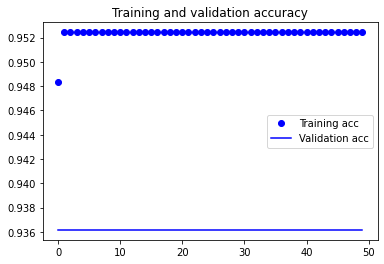

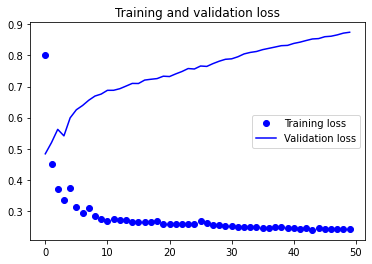

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
labeltest = testY.astype(int)
labeltest = indices_to_one_hot(labeltest, nb_classes)
#trainY = trainY[1:]
print(testX.shape)

In [ ]:
Y_test_pred = model.predict(testX)


In [ ]:
print(Y_test_pred[1590])

[9.2674303e-01 3.8103379e-02 1.4086149e-02 3.1926270e-08 2.7028575e-08
 3.7160220e-08 3.1611787e-08 2.1067344e-02]
